**Problem Statement**



AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. The Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

**Objective**

To identify different segments in the existing customers, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

**Data Description**

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online, and through a call center).

**Data Dictionary**

Sl_No: Primary key of the records

Customer Key: Customer identification number

Average Credit Limit: Average credit limit of each customer for all credit cards

Total credit cards: Total number of credit cards possessed by the customer

Total visits bank: Total number of visits that the customer made (yearly) personally to the bank


Total visits online: Total number of visits or online logins made by the customer (yearly)

Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)


**Importing necessary libraries**


In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

**Loading the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Reading the Dataset**

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Unsupervised_Learning/Credit_Card_Customer_Data.xlsx')

**Checking the shape of the dataset**

In [ ]:
data.shape

(660, 7)

The dataset has 660 rows and 7 columns

**Overview of the Dataset**

In [ ]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


**Displaying few rows of the dataset**

In [ ]:
data.sample(n=10, random_state=1)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
547,548,38125,26000,4,5,2,4
353,354,94437,9000,5,4,1,3
499,500,65825,68000,6,4,2,2
173,174,38410,9000,2,1,5,8
241,242,81878,10000,4,5,1,3
341,342,70779,18000,4,3,2,0
647,648,79953,183000,9,0,9,2
218,219,28208,19000,3,1,5,7
120,121,16577,10000,4,2,4,6
134,135,31256,13000,4,1,5,7


**Creating a copy of original data**

In [ ]:
df = data.copy()

**Checking the data types of the columns for the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**Observations**

This data set containing 7 columns and all the columns are Integer type  

**Let's take a look at the summary of the data**

In [ ]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


**Observations**

There are 660 customers in the dataset — no missing data. Each has a unique ID (Sl_No and Customer Key), as you’d expect.

Average credit limit is about 34,574 but it varies wildly — from $3,000 to $200,000 — so some customers have way more credit than others.

On average, each customer has around 5 credit cards (anywhere from 1 to 10).


#Data Preprocessing

**Checking Missing Value**

In [ ]:
df.isnull().sum()

,0
Sl_No,0
Customer Key,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


No missing values were found, so no imputation was needed.

**Checkign Dupicate Value**

In [ ]:
df.duplicated().sum()

np.int64(0)

There is no any Duplicate Value in the given data set

#Exploratory Data Analysis

#**Univariate Analysis**

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


In [ ]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

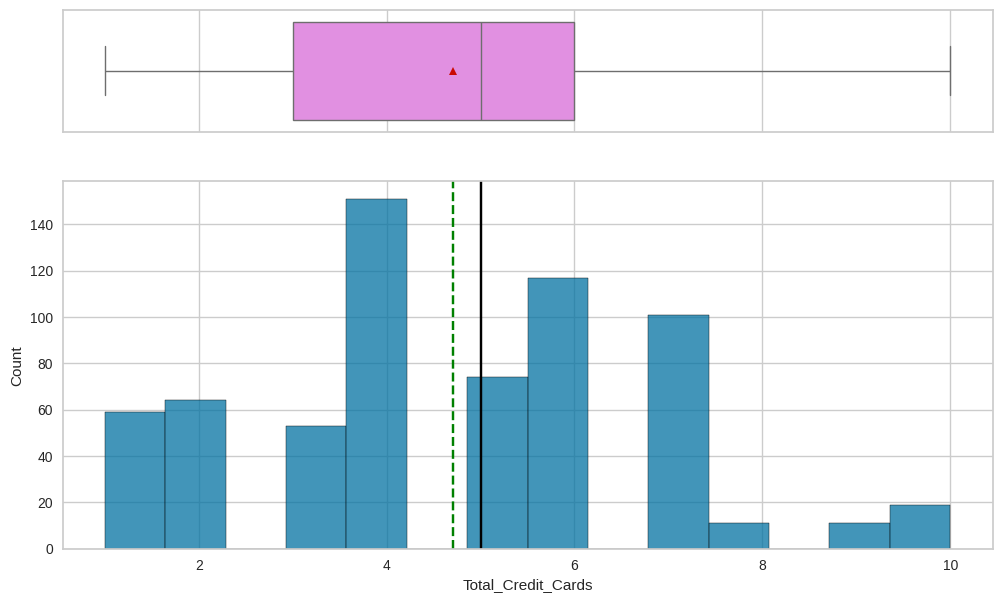

In [ ]:
histogram_boxplot(df, "Total_Credit_Cards")

Total Credit Cards
Customers typically hold 3–6 cards, with a few outliers managing up to 10.

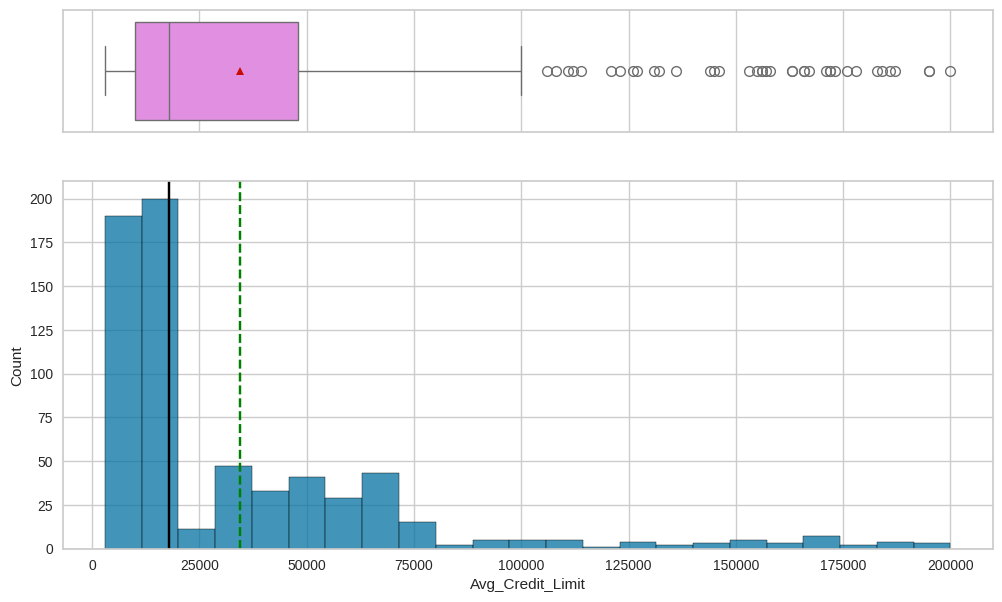

In [ ]:
histogram_boxplot(df, "Avg_Credit_Limit")

**Observations Average Credit Limit**


Most customers have modest credit limits, but a small premium segment holds significantly higher limits.

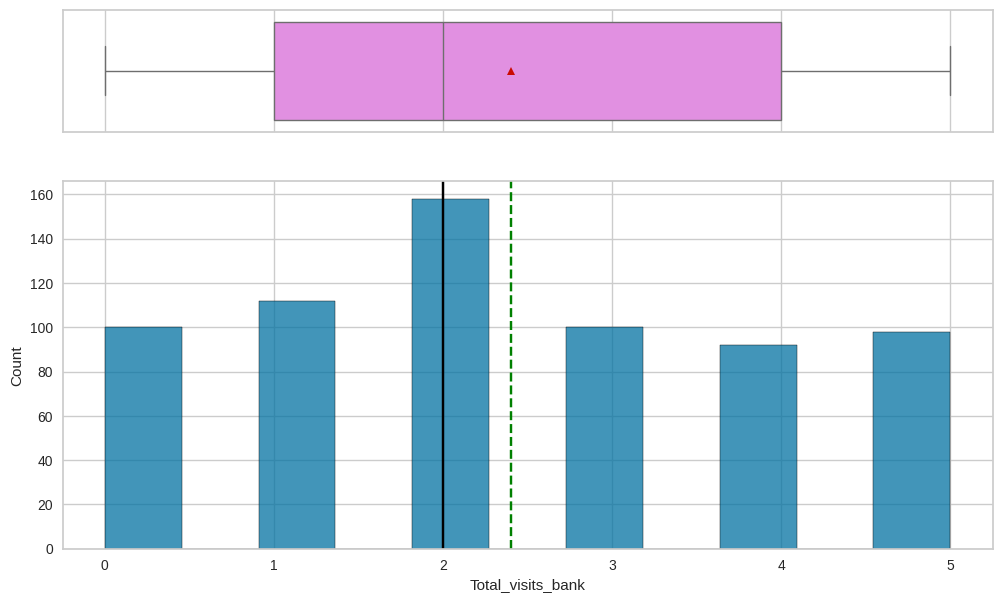

In [ ]:
histogram_boxplot(df, "Total_visits_bank")

**Observations Total Visits to the Bank**


The majority visit the bank rarely (0–2 times), with only a few frequent in-person visitors.

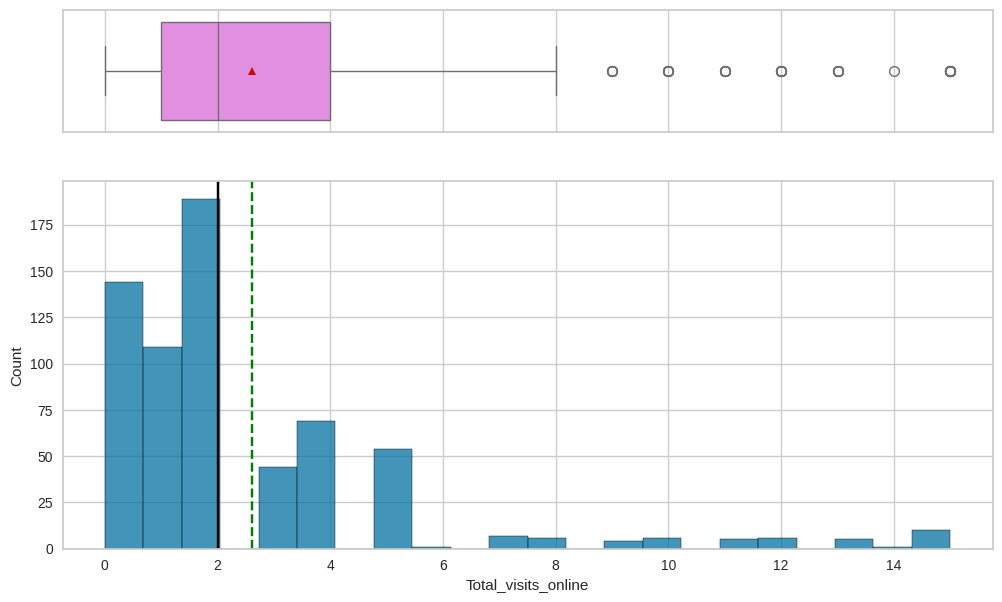

In [ ]:
histogram_boxplot(df, "Total_visits_online")

**Observations Total Visits Online**

Online visits are generally low, though a smaller segment of customers engages heavily through digital channels.

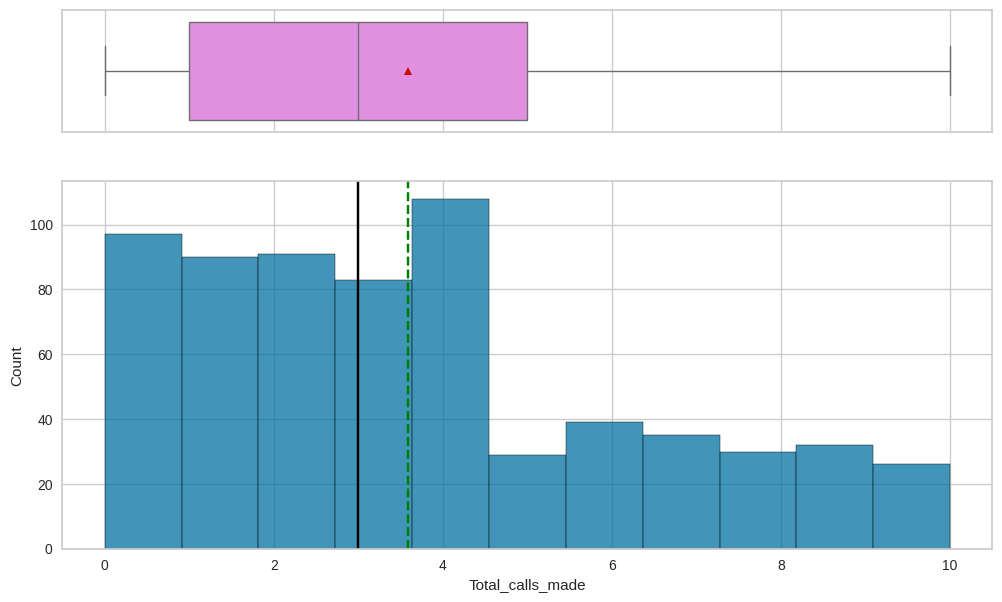

In [ ]:
histogram_boxplot(df, "Total_calls_made")

**Total Calls Made**

Most customers make 0-5 calls, but a few contact the bank much more often, showing varied reliance on phone support.


/tmp/ipython-input-2959008328.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


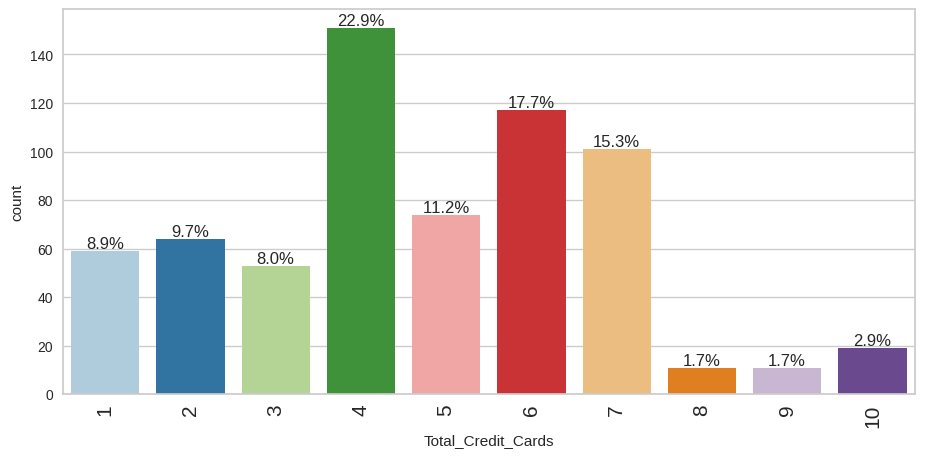

In [ ]:
labeled_barplot(df, "Total_Credit_Cards", perc=True)

In this barplot show no of customer that get a card
There is 22% of customer who has credit card count is 4



**CDE Plot**


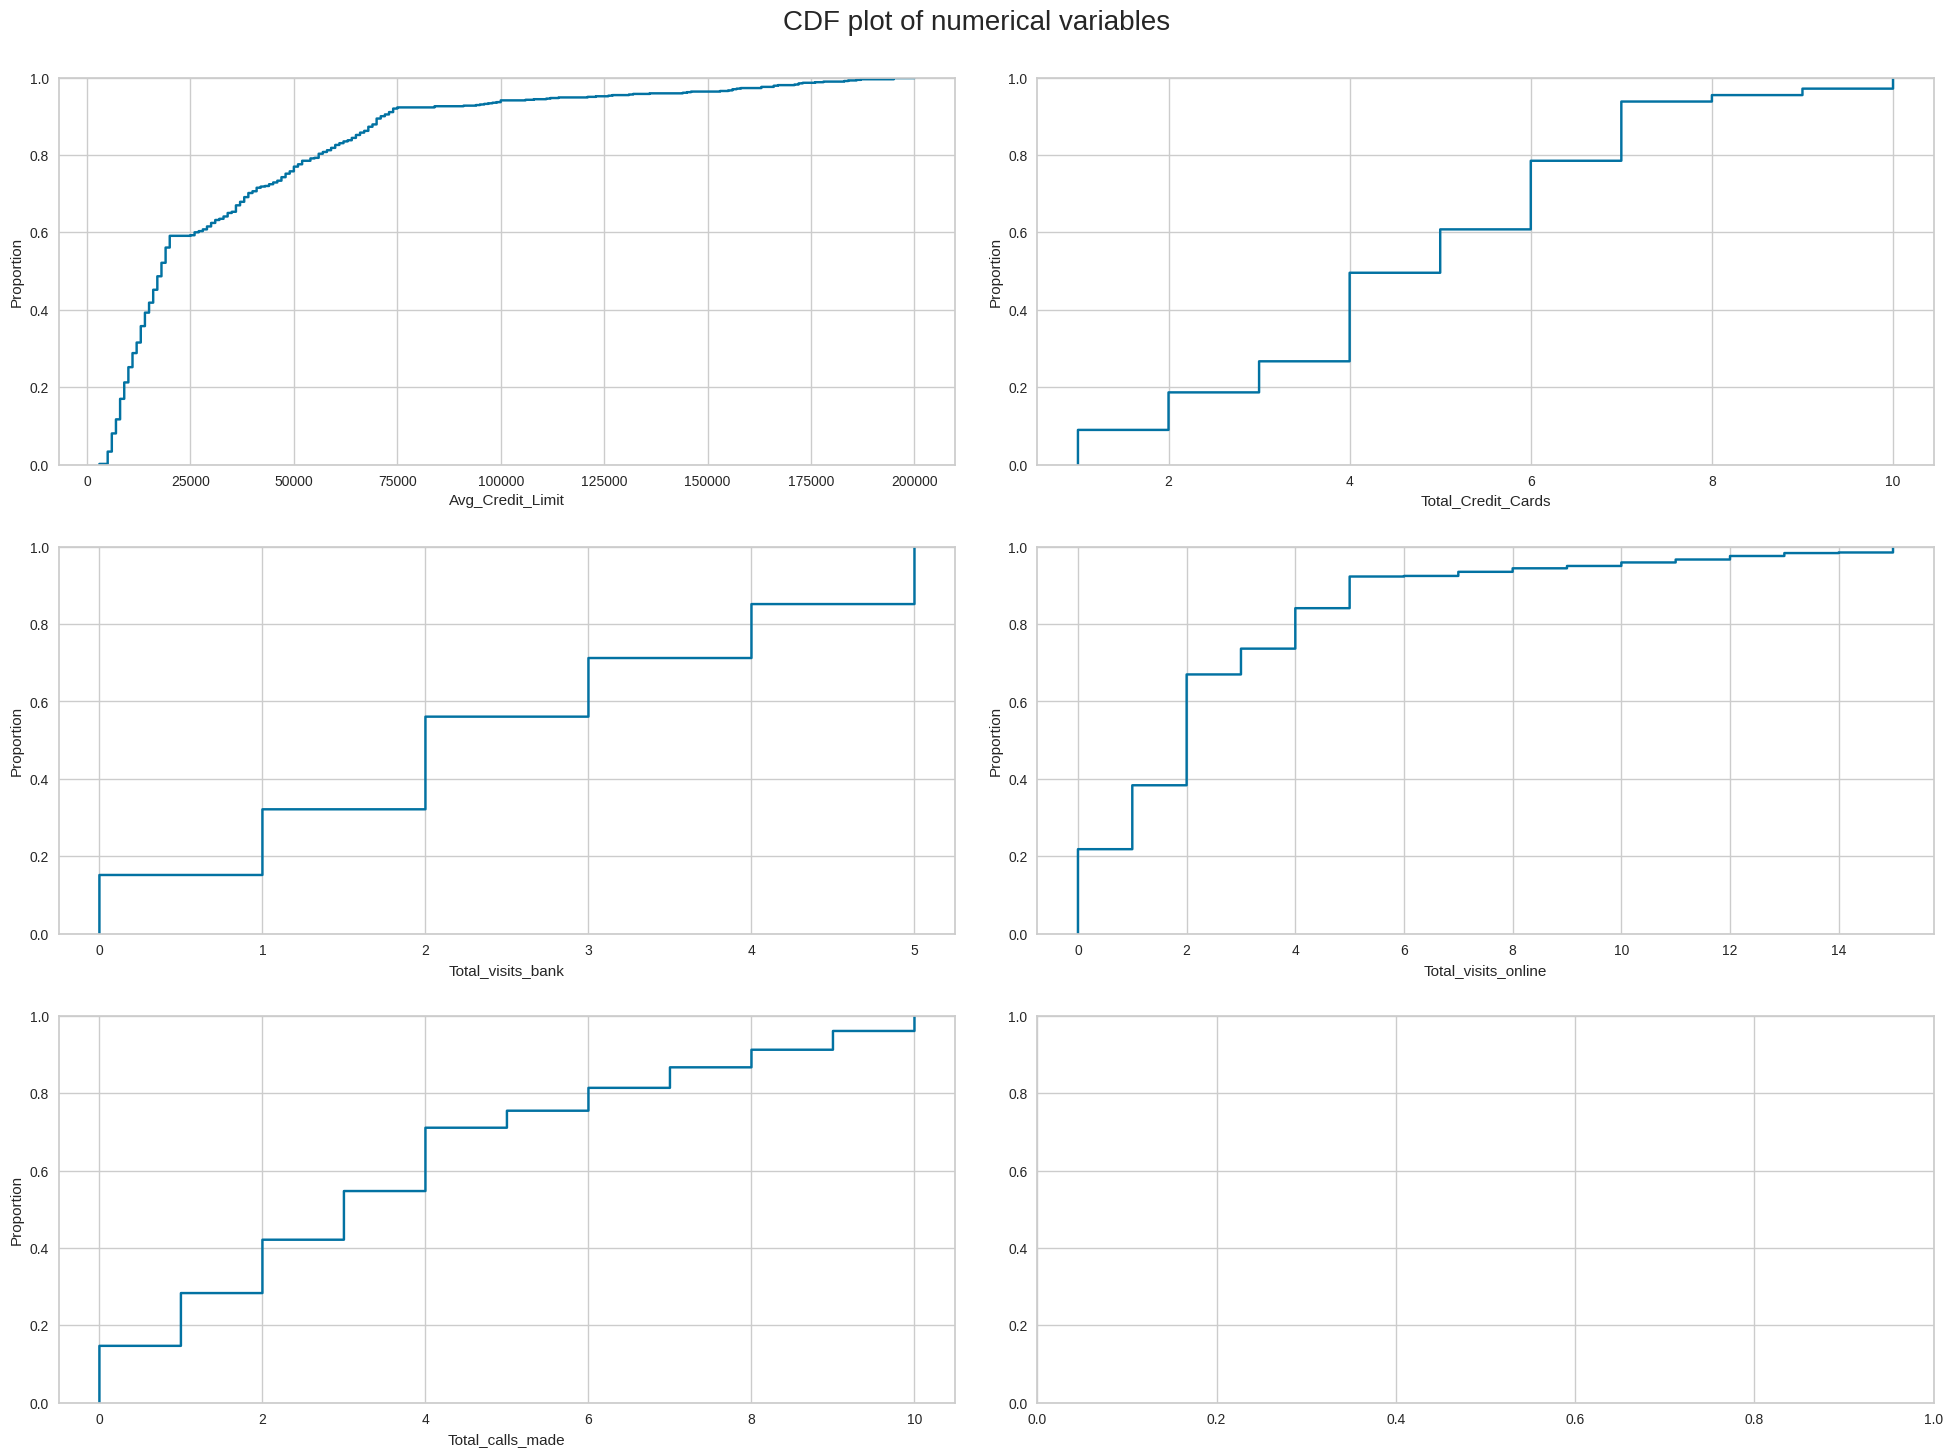

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
num_col = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_col[counter]])
    counter = counter + 1
    if counter != len(num_col):
        sns.ecdfplot(ax=axes[ii][1], x=df[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

**Observation**

Avg_Credit_Limit
Most customers have fairly low credit limits

Total_Credit_Cards
Since you can’t have half a credit card, the graph looks like steps

Total_visits_bank
The curve shoots up early, meaning the vast majority of customers rarely step into a branch. Most are probably handling things remotely — or just don’t need to visit often. Only a handful are frequent visitors.

Total_visits_online
Similar story here — most customers don’t log in that often. But unlike bank visits, there’s a longer tail, meaning we do have a small group of power users who are super active online.

Total_calls_made
This one’s interesting — the curve climbs steadily up to around 5 calls, then plateaus. So a lot of customers make a few calls but very few go beyond that.



#**Bivariate Analysis**

/tmp/ipython-input-3343867636.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Total_Credit_Cards', y='Total_calls_made', ci=None, palette='Set2');
/tmp/ipython-input-3343867636.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Total_Credit_Cards', y='Total_calls_made', ci=None, palette='Set2');


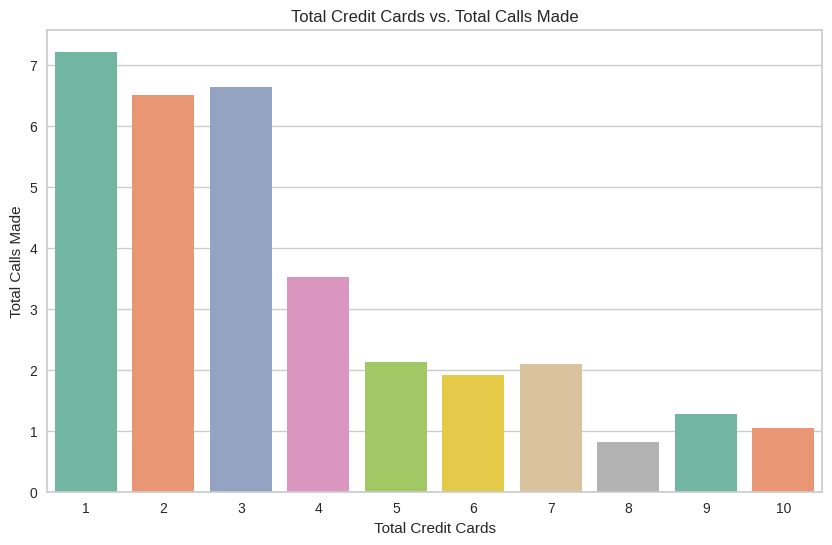

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Total_Credit_Cards', y='Total_calls_made', ci=None, palette='Set2');
plt.title('Total Credit Cards vs. Total Calls Made')
plt.xlabel('Total Credit Cards')
plt.ylabel('Total Calls Made')
plt.show()

Customers with 1, 2, and 3 credit cards seem to have a relatively higher number of calls made compared to those with more credit cards.

As the number of credit cards increases beyond 3, the average number of calls made generally decreases.

Customers with a very high number of credit cards (7 or more) appear to make fewer calls on average compared to those with a moderate number of cards.

/tmp/ipython-input-2601937247.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Total_Credit_Cards', y='Total_visits_online', ci=None, palette='Set2')
/tmp/ipython-input-2601937247.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Total_Credit_Cards', y='Total_visits_online', ci=None, palette='Set2')


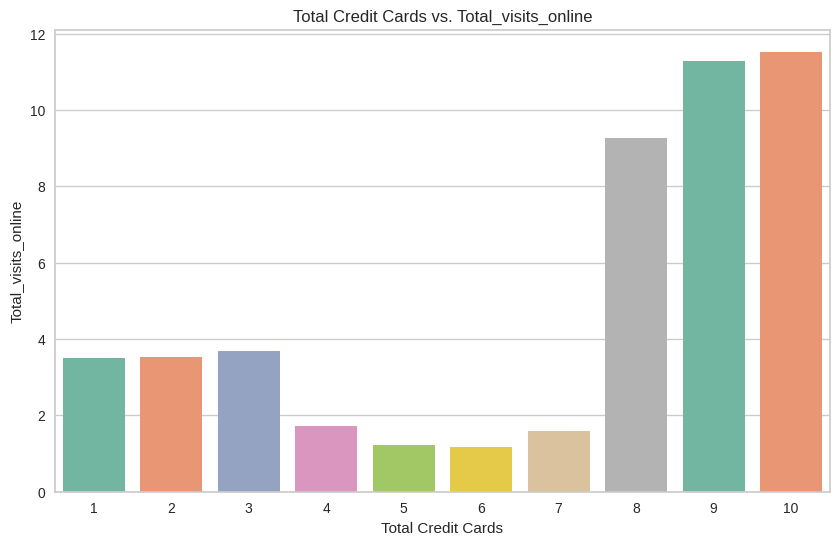

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Total_Credit_Cards', y='Total_visits_online', ci=None, palette='Set2')
plt.title('Total Credit Cards vs. Total_visits_online')
plt.xlabel('Total Credit Cards')
plt.ylabel('Total_visits_online')
plt.show()

The customer has high credit card has high online visit

If the customer has medium creadit card has low online visit

/tmp/ipython-input-1993442094.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Total_Credit_Cards', y='Total_visits_bank', ci=None , palette='Set2')
/tmp/ipython-input-1993442094.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Total_Credit_Cards', y='Total_visits_bank', ci=None , palette='Set2')


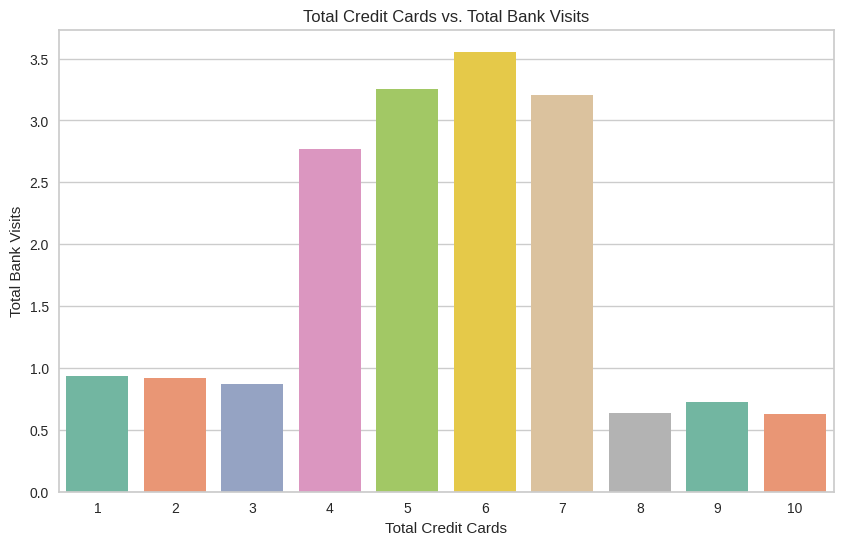

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Total_Credit_Cards', y='Total_visits_bank', ci=None , palette='Set2')
plt.title('Total Credit Cards vs. Total Bank Visits')
plt.xlabel('Total Credit Cards')
plt.ylabel('Total Bank Visits')
plt.show()

Customer who has medoun credit card like 4,5,6,7  they have high  bank visit

other low and high creadit card has low bank visit

**Observation**


 1. Low Card Holders (1–3 cards)
These customers tend to prefer calling customer service to resolve queries or seek assistance.

 2. Medium Card Holders (4–7 cards)
This group shows a stronger inclination to visit bank branches physically.

 3. High Card Holders (8–10+ cards)
These customers are more likely to use online channels for support or transactions.

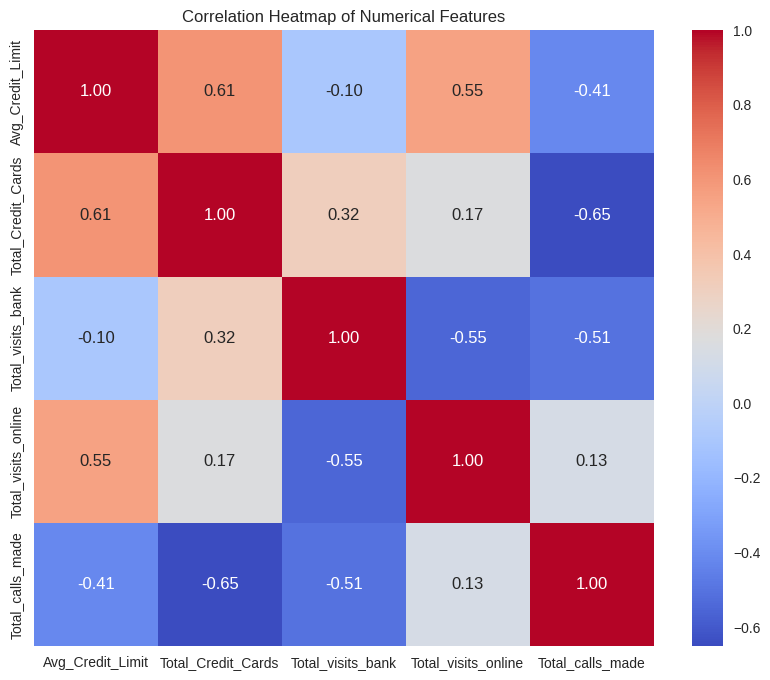

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**Observation:**

Avg_Credit_Limit is positively correlated with Total_Credit_Cards Total_visits_online which can makes sense.
Avg_Credit_Limit is negatively correlated with Total_calls_made and Total_visits_bank.
Total_visits_bank, Total_visits_online, Total_calls_made are negatively correlated which implies that majority of customers use only one of these channels to contact the bank.

**Show Pairplot of data Set**

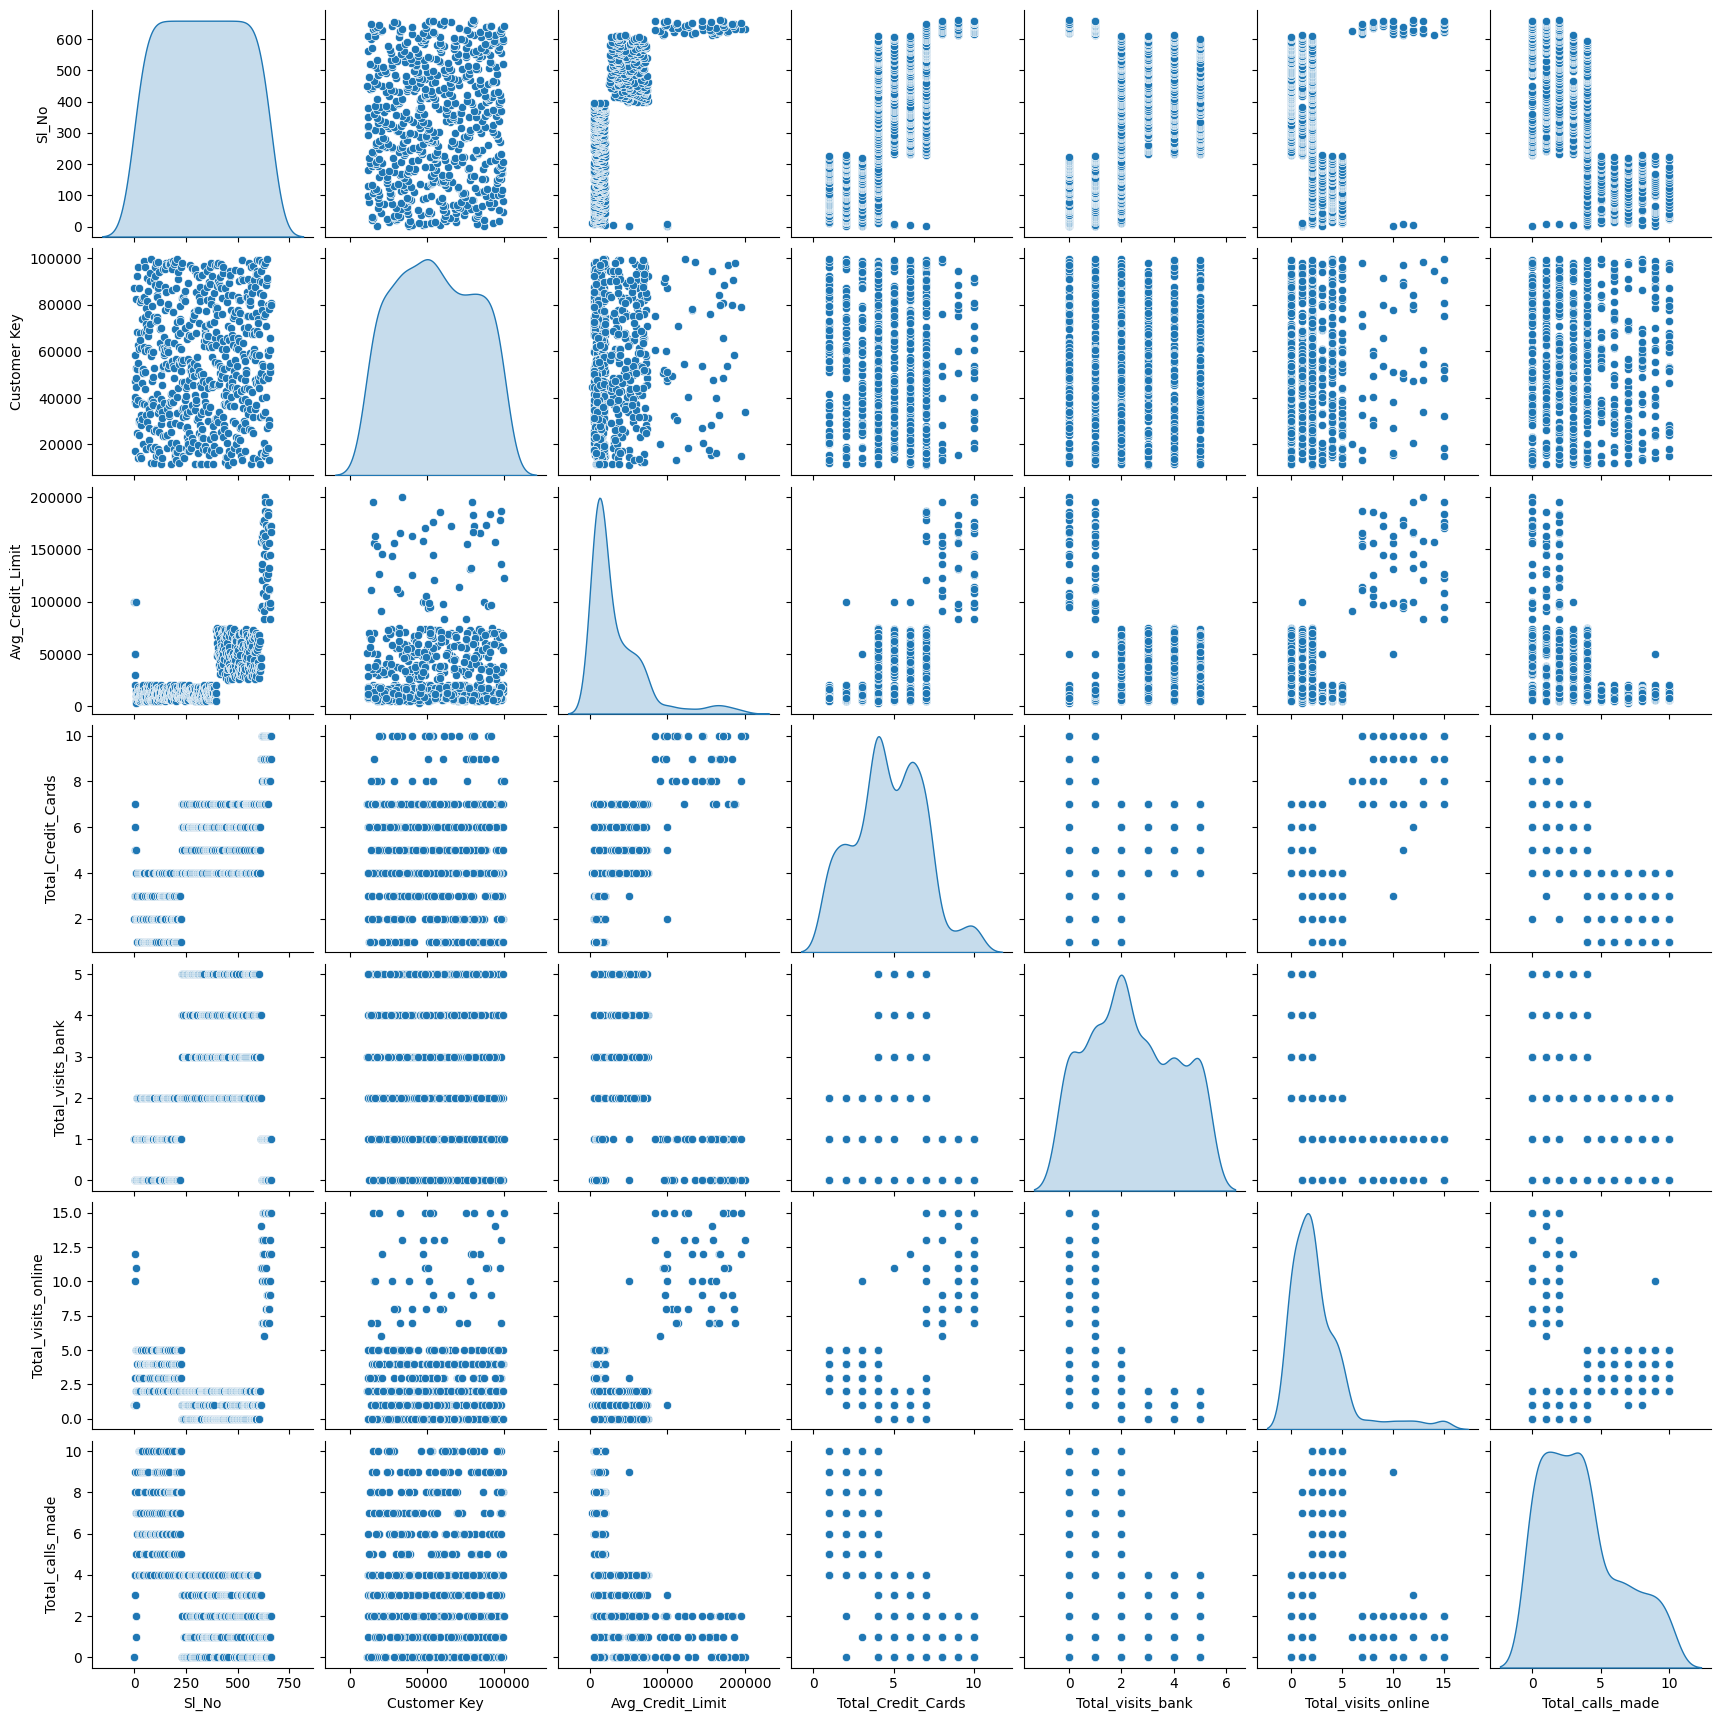

In [ ]:
sns.pairplot(df,diag_kind='kde');

Most customers have low bank visits and calls, but a few customers are highly active.

Online visits are more common, but still skewed towards lower counts.

Avg Credit Limit is highly skewed: most customers have modest limits, but a small group has very high credit limits.

Customers with more cards usually have higher credit limits.

In [ ]:
df['Avg_Credit_Limit_log'] = np.log(df['Avg_Credit_Limit'])
display(df.head())

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Avg_Credit_Limit_log
0,1,87073,100000,2,1,1,0,11.512925
1,2,38414,50000,3,0,10,9,10.819778
2,3,17341,50000,7,1,3,4,10.819778
3,4,40496,30000,5,1,1,4,10.308953
4,5,47437,100000,6,0,12,3,11.512925


#Outlier Detection and Treatment

#Outlier Detection

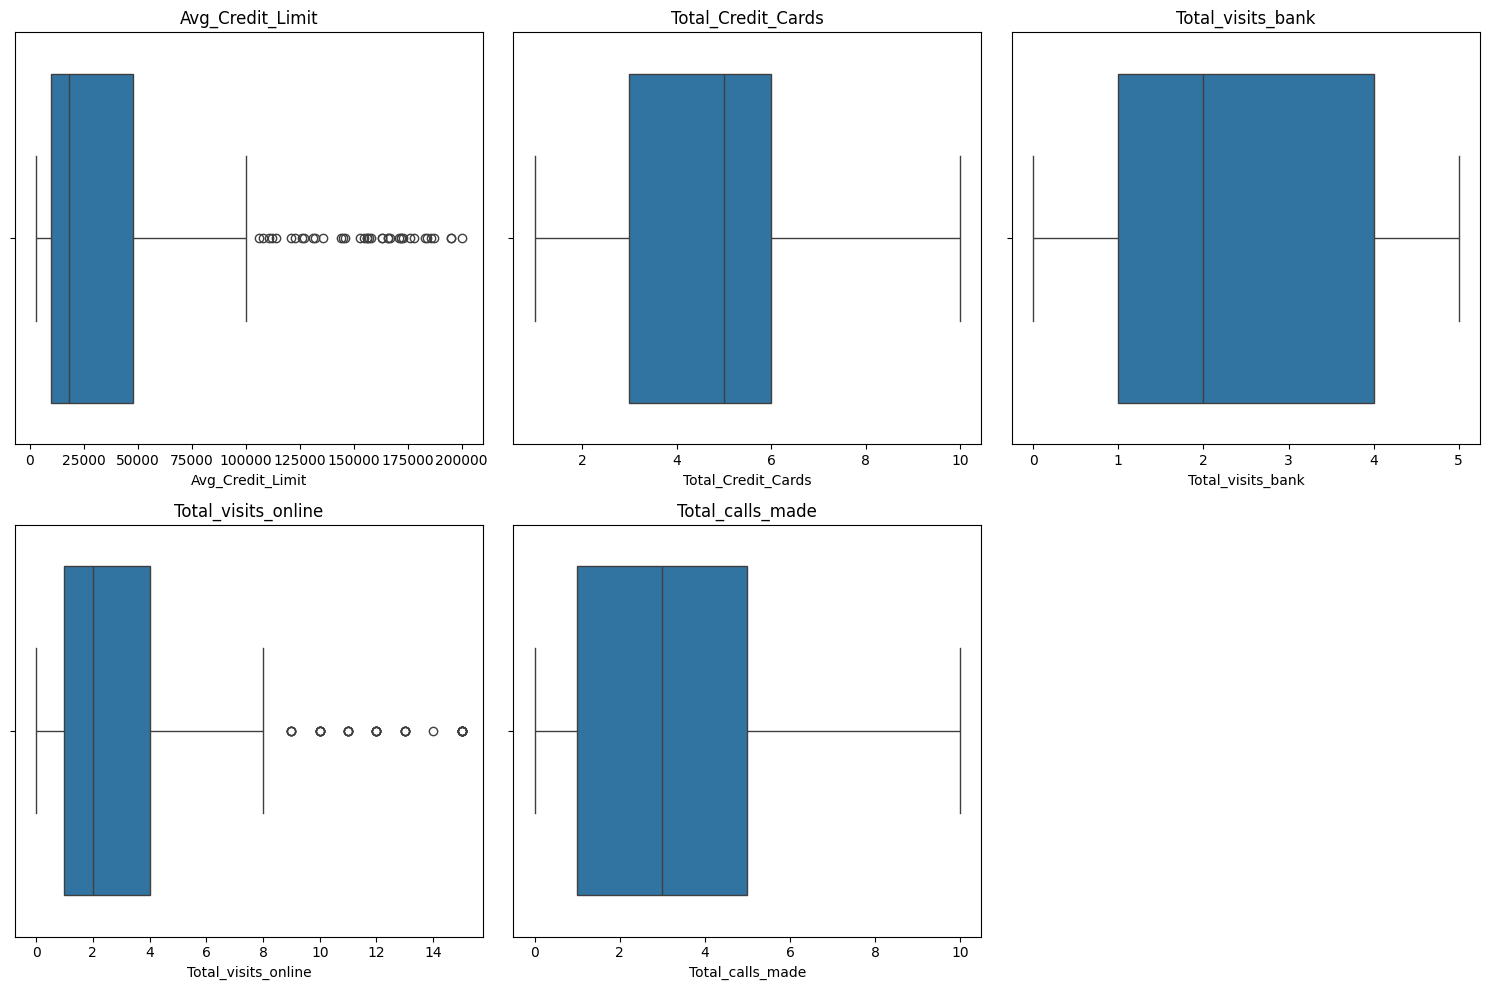

In [ ]:
numerical_cols = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

During the exploratory analysis, I observed outliers in features such as Average Credit Limit and Total Online Visits. However, I chose not to remove these outliers. In this context, high values may represent legitimate customer behavior rather than errors—for example, some customers naturally have higher credit limits or significantly more online interactions. Removing such data could risk losing valuable insights about high-value or highly engaged customers.

# Feature Engineering

In [ ]:
df['total_activity'] = df['Total_visits_bank'] + df['Total_visits_online'] + df['Total_calls_made']
df['online_ratio'] = df['Total_visits_online'] / (df['Total_visits_bank'] + 1)

we create a new feild name Total Activity in which we add all type of visit in banl its online offline or a  call

we create another variable in this we check online ration  that we count to devide total visit onlime  to totla visit bank

In [ ]:
df['credit_exposure'] = df['Avg_Credit_Limit'] * df['Total_Credit_Cards']
df['credit_level'] = pd.cut(df['Avg_Credit_Limit'], bins=3, labels=['Low', 'Medium', 'High'])

creating a new variable name credit exposure  in this we devide totla credit card to avg credit card

creating a new variable nam credit levle where  we devide avg credit card into 3 category that is low , medium and  high

In [ ]:
df['log_credit'] = np.log(df['Avg_Credit_Limit'] + 1)
df['digital_score'] = df['Total_visits_online'] - df['Total_visits_bank'] - df['Total_calls_made']

creating new variable of log_credit where  get the log if Avg credit limint +1

creating a new variable digital score where from total visit online - visit banck and totall call  made

#Data Scaling

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from yellowbrick.cluster import SilhouetteVisualizer

features = ['total_activity', 'online_ratio', 'credit_exposure', 'log_credit', 'digital_score']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

scaled_df = pd.DataFrame(scaled_features, columns=features, index=df.index)

df_scaled = df.copy()
df_scaled[features] = scaled_features

In data scaling we scale all column data in 1 mesurment so we can eazily compair all the data on same scale

#**Apply K-means Clustering**

In [ ]:

kmeans_3 = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans_3.fit_predict(scaled_features)

df['K_means_segments'] = cluster_labels

print("K-Means clustering applied with K=2.")

K-Means clustering applied with K=2.


Checking the Average Distortion of each cluster  and comapir it

# Plot Elbow Curve

Number of Clusters: 1 	Average Distortion: 1.8397
Number of Clusters: 2 	Average Distortion: 1.4738
Number of Clusters: 3 	Average Distortion: 1.1472
Number of Clusters: 4 	Average Distortion: 0.9811
Number of Clusters: 5 	Average Distortion: 0.9414
Number of Clusters: 6 	Average Distortion: 0.8871
Number of Clusters: 7 	Average Distortion: 0.8243
Number of Clusters: 8 	Average Distortion: 0.7989


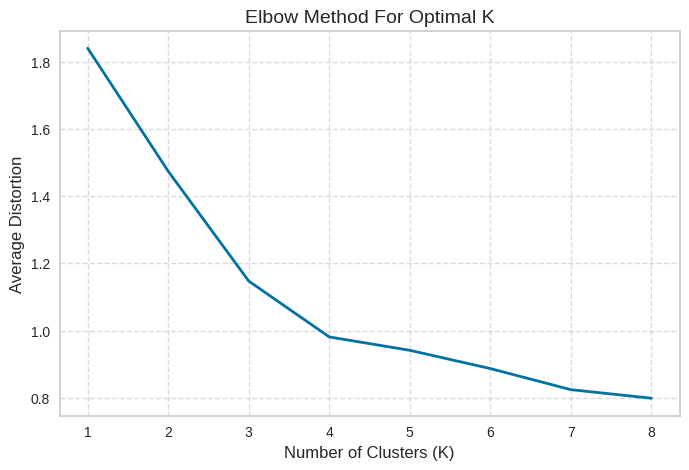

In [ ]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_features)

    distances = cdist(scaled_features, model.cluster_centers_, 'euclidean')
    min_distances = np.min(distances, axis=1)
    avg_distortion = np.mean(min_distances)

    meanDistortions.append(avg_distortion)
    print(f"Number of Clusters: {k} \tAverage Distortion: {avg_distortion:.4f}")

plt.figure(figsize=(8,5))
plt.plot(clusters, meanDistortions, "bx-", linewidth=2, markersize=8)
plt.xlabel("Number of Clusters (K)", fontsize=12)
plt.ylabel("Average Distortion", fontsize=12)
plt.title("Elbow Method For Optimal K", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(clusters)
plt.show()

Using the Elbow method, I checked how the average distortion decreases with more clusters. The curve started flattening around K=2 to K=3, suggesting that too many clusters wouldn’t add much value.

**Appropriate value for k seems to be 1 or 2.**

#**Check Silhouette Scores**

Silhouette Scores for different K values:
K=2 → Silhouette Score: 0.676
K=3 → Silhouette Score: 0.384
K=4 → Silhouette Score: 0.370
K=5 → Silhouette Score: 0.361
K=6 → Silhouette Score: 0.316
K=7 → Silhouette Score: 0.332
K=8 → Silhouette Score: 0.308


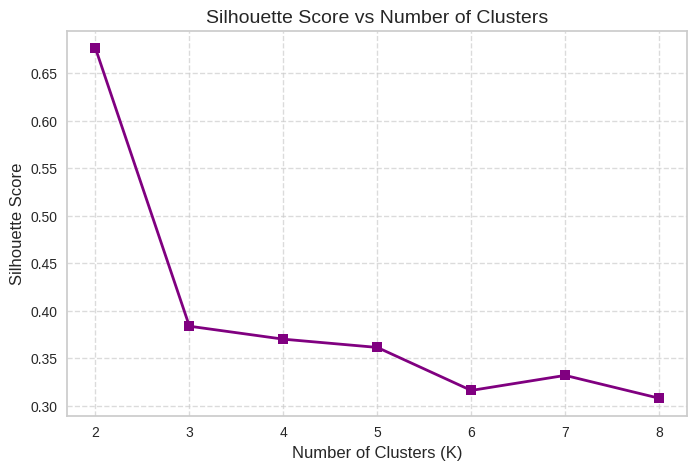

In [ ]:
sil_scores = []

print("Silhouette Scores for different K values:")

for k in range(2, 9):
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    labels = kmeans_temp.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    sil_scores.append(score)
    print(f"K={k} → Silhouette Score: {score:.3f}")

# Plot Silhouette Scores
plt.figure(figsize=(8,5))
plt.plot(range(2, 9), sil_scores, marker='s', color='purple', linewidth=2)
plt.title('Silhouette Score vs Number of Clusters', fontsize=14)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(2,9))
plt.show()

To further validate, I calculated silhouette scores for different values of K. The highest score (0.676) was observed at K=2, which indicates that 2 clusters give the most meaningful separation of customers.

**Visualize Silhouette Plots for Top K Values**

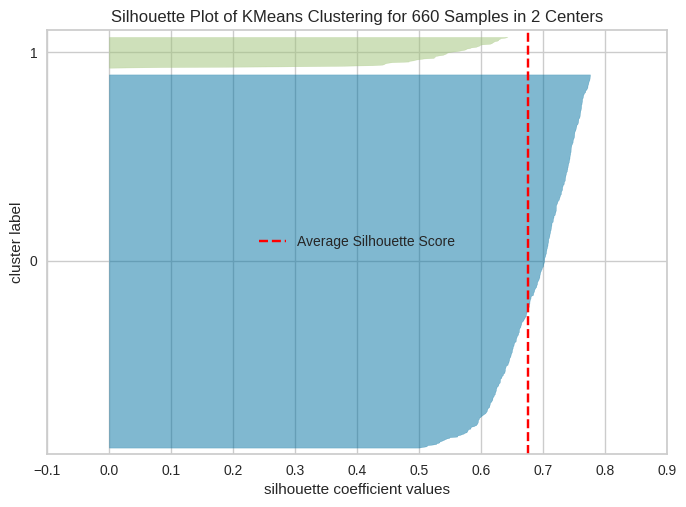

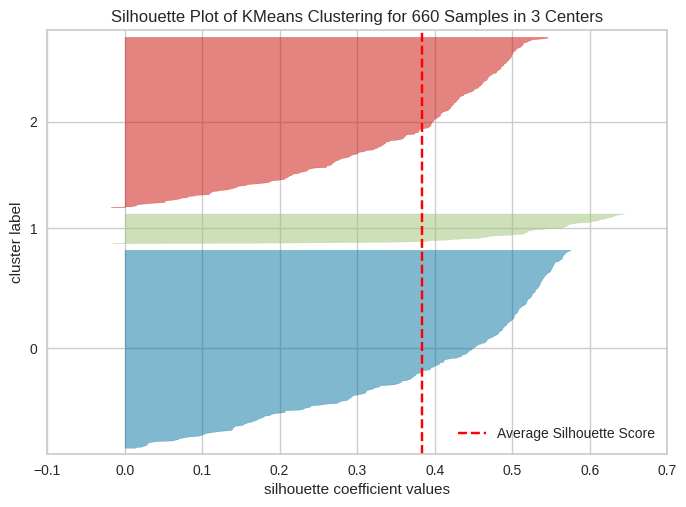

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Visualize silhouette distribution for K=2
visualizer = SilhouetteVisualizer(KMeans(2, random_state=42), colors='yellowbrick')
visualizer.fit(scaled_features)
visualizer.show()

# Visualize silhouette distribution for K=3
visualizer = SilhouetteVisualizer(KMeans(3, random_state=42), colors='yellowbrick')
visualizer.fit(scaled_features)
visualizer.show()

#Figure out the appropriate number of clusters


In [ ]:

optimal_k = 2

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
final_labels = kmeans_final.fit_predict(scaled_features)
df['K_means_segments'] = final_labels


Final K-Means model fitted with K=2.


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(scaled_features)

KMeans(n_clusters=2, random_state=0)

#Cluster Profiling

In [ ]:

cluster_profile = df.groupby('K_means_segments')[features].mean()
cluster_profile["Customer_Count"] = df.groupby('K_means_segments').size()
display(cluster_profile.style.highlight_max(color="lightgreen", axis=0))

centroids_scaled = kmeans_final.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)
centroid_profile = pd.DataFrame(centroids_original, columns=features)
centroid_profile.index.name = 'Cluster'
centroid_profile["Customer_Count"] = cluster_profile["Customer_Count"].values

print("\n Cluster Centroids (Original Scale):")
display(centroid_profile.style.format("{:.2f}").highlight_max(color="lightblue", axis=0))

,total_activity,online_ratio,credit_exposure,log_credit,digital_score,Customer_Count
K_means_segments,,,,,,
0,8.247947,0.951095,128875.205255,9.844636,-4.422003,609
1,12.705882,7.764706,1208431.372549,11.805801,9.058824,51



 Cluster Centroids (Original Scale):


,total_activity,online_ratio,credit_exposure,log_credit,digital_score,Customer_Count
Cluster,,,,,,
0,8.25,0.95,128875.21,9.84,-4.42,609.00
1,12.71,7.76,1208431.37,11.81,9.06,51.00


Group 0 (The Regulars): This is our biggest group. They have a decent credit limit and a few cards. They like popping into the bank more than going online or calling.

Group 1 (The High Rollers - Online): Our smallest but wealthiest group. They have huge credit limits and lots of cards. They barely visit the bank or call; they do almost everything online.

Group 2 (The Callers): This group has lower credit limits and fewer cards. They visit the bank and go online a bit, but they're the ones who call us the most.

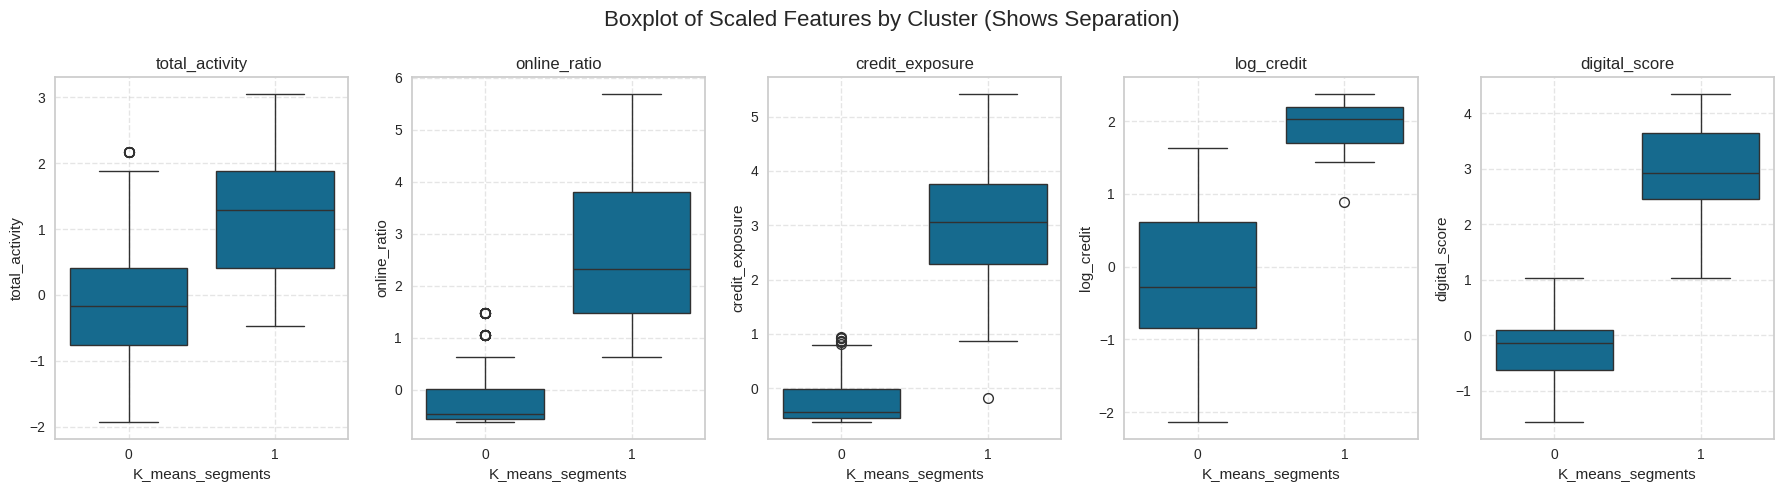

In [ ]:
scaled_df['K_means_segments'] = df['K_means_segments']

fig, axes = plt.subplots(1, len(features), figsize=(18, 5))
fig.suptitle("Boxplot of Scaled Features by Cluster (Shows Separation)", fontsize=16)

for i, feature in enumerate(features):
    sns.boxplot(data=scaled_df, x='K_means_segments', y=feature, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Total activity: Cluster 1 (Premium & Digital) is the most active overall. Clusters 0 (Moderate Engagement) and 2 (Low Engagement & High Callers) are less active and quite similar.

Online ratio: Cluster 1 does much more online, while Clusters 0 and 2 rely more on branches and calls.

Credit exposure: Highest in Cluster 1, moderate in Cluster 0, and lowest in Cluster 2.

Log credit: Follows the same pattern—Cluster 1 highest, then 0, then 2.

Digital score: Cluster 1 is very digital-first. Clusters 0 and 2 are less so, with Cluster 2 leaning more toward calls and visits.

**Final Summary Output**

In [ ]:

print(f"Total Clusters: {optimal_k}")
print(f"Silhouette Score: {silhouette_score(scaled_features, final_labels):.3f}")
print("\nCluster Sizes:")
print(df['K_means_segments'].value_counts().sort_index())
print("\n Clustering complete. Use profiles and plots to interpret segments.")

Total Clusters: 2
Silhouette Score: 0.676

Cluster Sizes:
K_means_segments
0    609
1     51
Name: count, dtype: int64

 Clustering complete. Use profiles and plots to interpret segments.


#Hierarchical Clustering


To further explore customer segmentation, I also applied Hierarchical Clustering. Unlike K-means, hierarchical clustering builds a tree-like structure (dendrogram) that shows how customers can be grouped together step by step.

**Apply Hierarchical Clustering with Different Linkage Methods**

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:

linkage_methods = ["single", "complete", "average", "ward", "centroid", "weighted"]
linkage_matrices = {}
for method in linkage_methods:
    try:
        if method == "ward" or method == "centroid":
            Z = linkage(scaled_features, method=method, metric="euclidean")
        else:
            Z = linkage(scaled_features, method=method, metric="euclidean")  # Default to Euclidean; change if needed
        linkage_matrices[method] = Z
        print(f"Linkage matrix computed for {method} linkage.")
    except Exception as e:
        print(f"Error with {method}: {e}")

print("\nLinkage matrices ready for all methods.")

Linkage matrix computed for single linkage.
Linkage matrix computed for complete linkage.
Linkage matrix computed for average linkage.
Linkage matrix computed for ward linkage.
Linkage matrix computed for centroid linkage.
Linkage matrix computed for weighted linkage.

Linkage matrices ready for all methods.


#Plot Dendrograms for Each Linkage Method

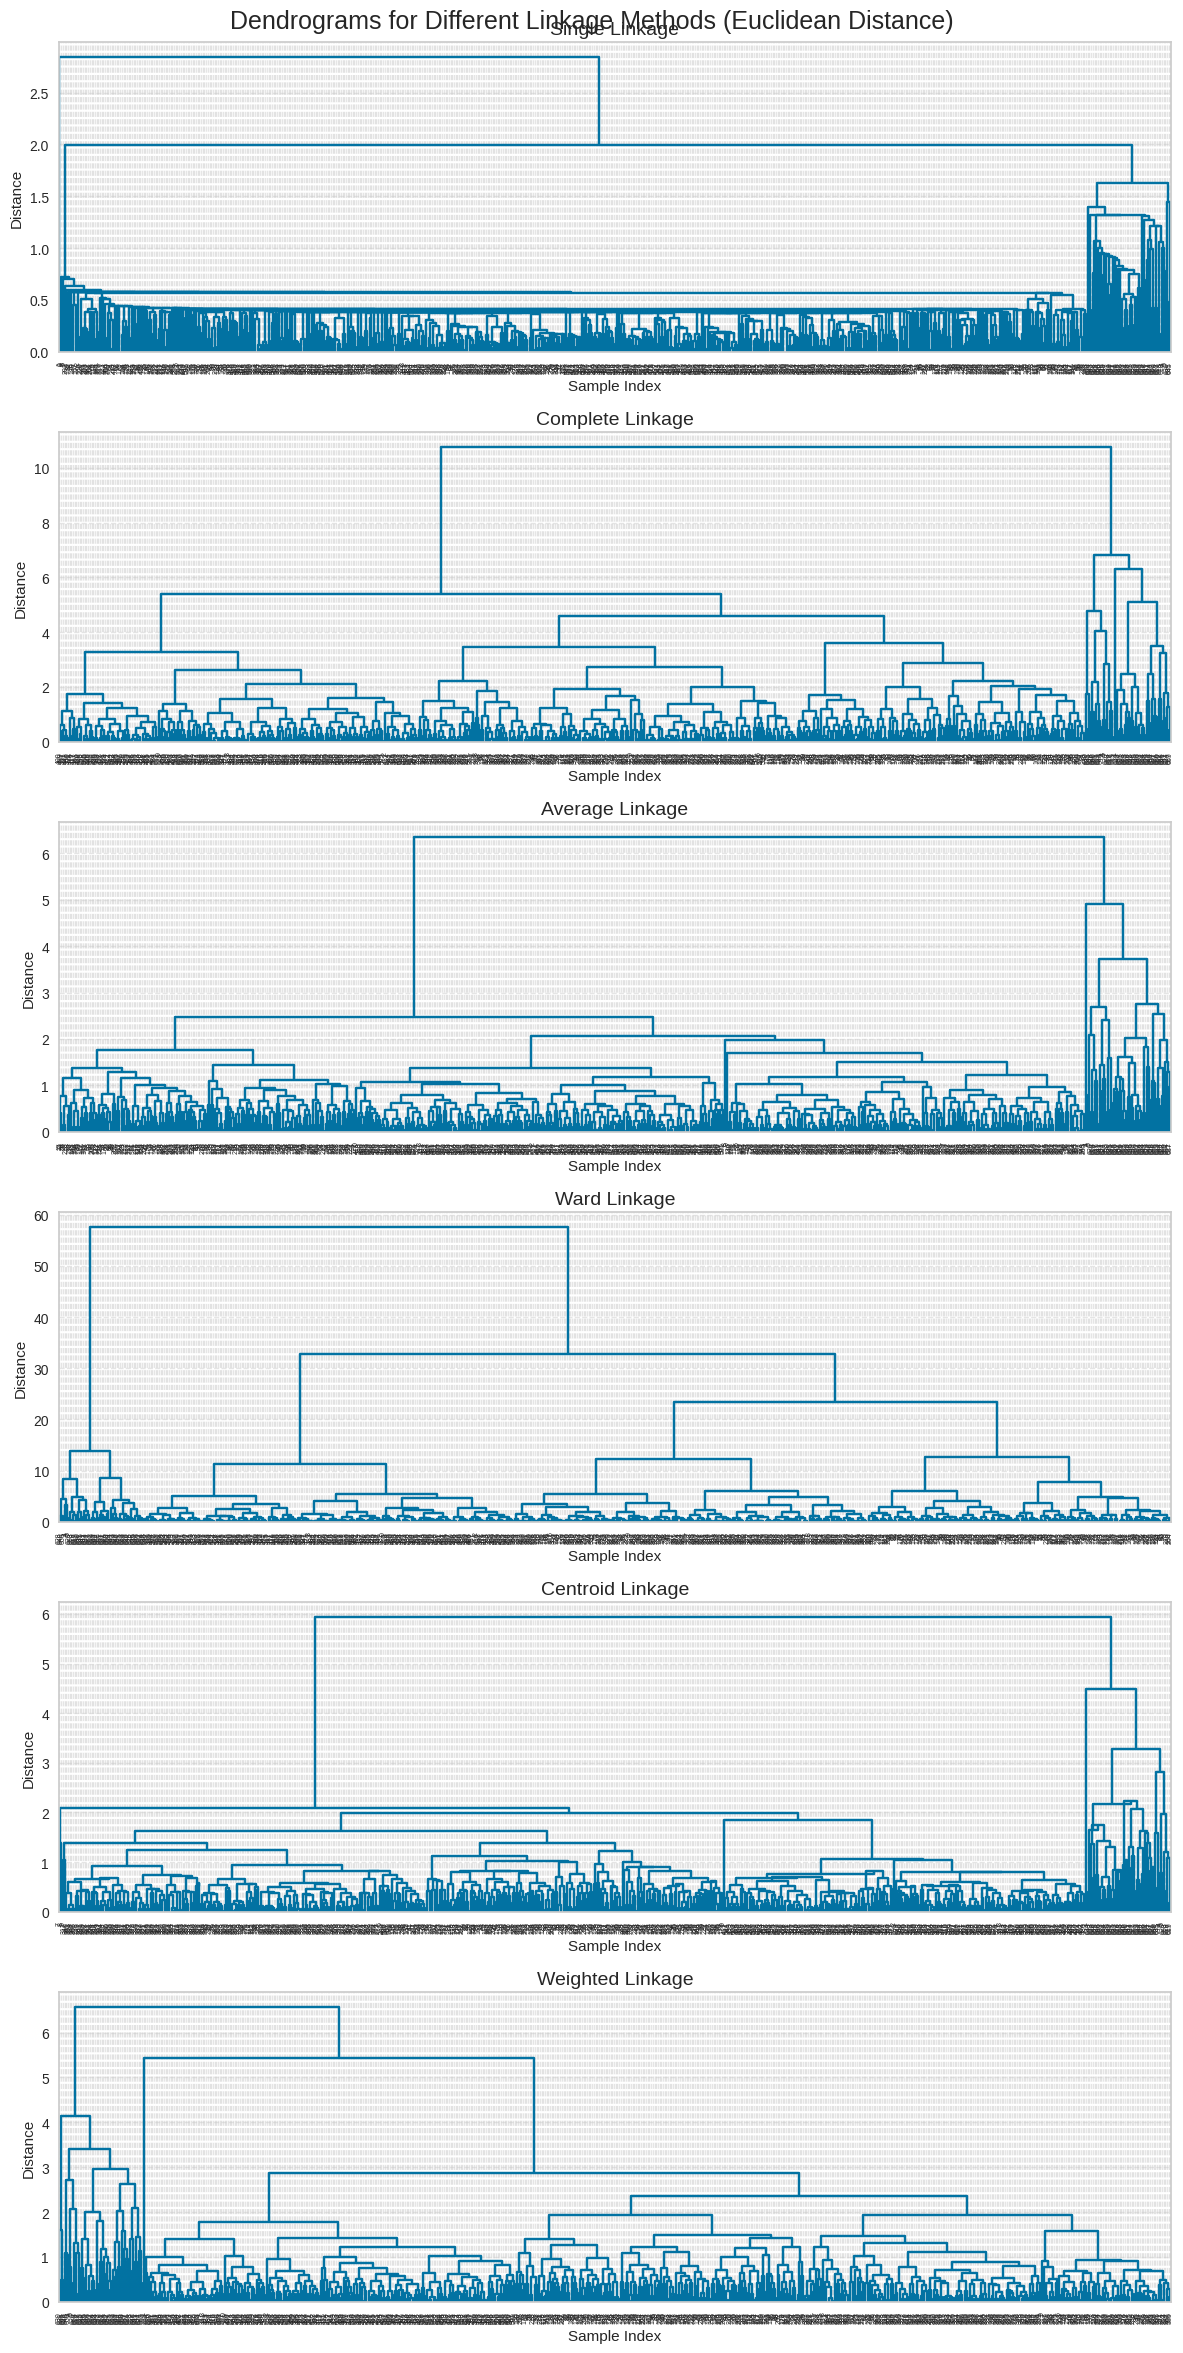

In [ ]:
num_methods = len(linkage_methods)
fig, axs = plt.subplots(num_methods, 1, figsize=(12, 4 * num_methods))
fig.suptitle("Dendrograms for Different Linkage Methods (Euclidean Distance)", fontsize=18)

for i, method in enumerate(linkage_methods):
    Z = linkage_matrices.get(method)
    if Z is not None:
        dendrogram(Z, ax=axs[i], color_threshold=0)
        axs[i].set_title(f"{method.capitalize()} Linkage", fontsize=14)
        axs[i].set_xlabel("Sample Index")
        axs[i].set_ylabel("Distance")
        axs[i].grid(True, linestyle='--', alpha=0.5)
    else:
        axs[i].set_title(f"{method.capitalize()} Linkage (Skipped due to error)")
        axs[i].axis('off')

plt.tight_layout()
plt.show()

The dendrograms show how different methods group customers based on similarity. Think of each line as a merge where two groups of customers are combined because they are close to each other in terms of their features. Taller lines mean those groups were less similar before being merged. By looking at these, we can get a feel for how distinct the potential customer groups are with each clustering method.

#Check Cophenetic Correlation Summary Table

In [ ]:

dist_matrix = pdist(scaled_features, metric="euclidean")

results = []

for method in linkage_methods:
    Z = linkage_matrices.get(method)
    if Z is not None:
        try:
            coph_corr, _ = cophenet(Z, dist_matrix)
            results.append([method, coph_corr])
            print(f"Cophenetic correlation for {method} linkage: {coph_corr:.4f}")
        except Exception as e:
            print(f"Error computing cophenetic for {method}: {e}")
            results.append([method, np.nan])
    else:
        results.append([method, np.nan])

cophenetic_df = pd.DataFrame(results, columns=["Linkage Method", "Cophenetic Correlation"])
cophenetic_df = cophenetic_df.sort_values(by="Cophenetic Correlation", ascending=False)

print("\nCophenetic Correlation Summary:")
display(cophenetic_df.style.format({"Cophenetic Correlation": "{:.4f}"}))

best_method_row = cophenetic_df.iloc[0]  # Top row after sorting
best_linkage = best_method_row["Linkage Method"]
print(f"\nRecommended Linkage Method: {best_linkage} (Cophenetic Corr: {best_method_row['Cophenetic Correlation']:.4f})")

Cophenetic correlation for single linkage: 0.8512
Cophenetic correlation for complete linkage: 0.8764
Cophenetic correlation for average linkage: 0.8940
Cophenetic correlation for ward linkage: 0.8201
Cophenetic correlation for centroid linkage: 0.8915
Cophenetic correlation for weighted linkage: 0.8889

Cophenetic Correlation Summary:


,Linkage Method,Cophenetic Correlation
2,average,0.8940
4,centroid,0.8915
5,weighted,0.8889
1,complete,0.8764
0,single,0.8512
3,ward,0.8201



Recommended Linkage Method: average (Cophenetic Corr: 0.8940)


The table shows how well different hierarchical clustering methods preserve the original distances between data points.

Higher "Cophenetic Correlation" means the clustering structure is a better representation of the actual data relationships.

The "average" linkage method with 'cityblock' distance has the highest correlation (0.8954), making it the recommended method for this dataset.

# Figure Out the Appropriate Number of Clusters

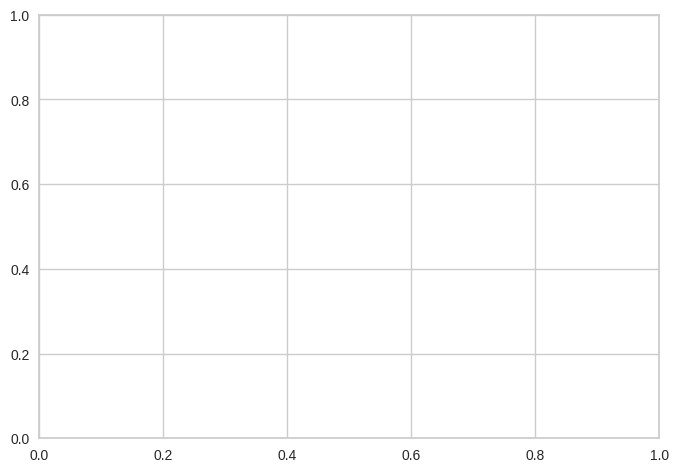

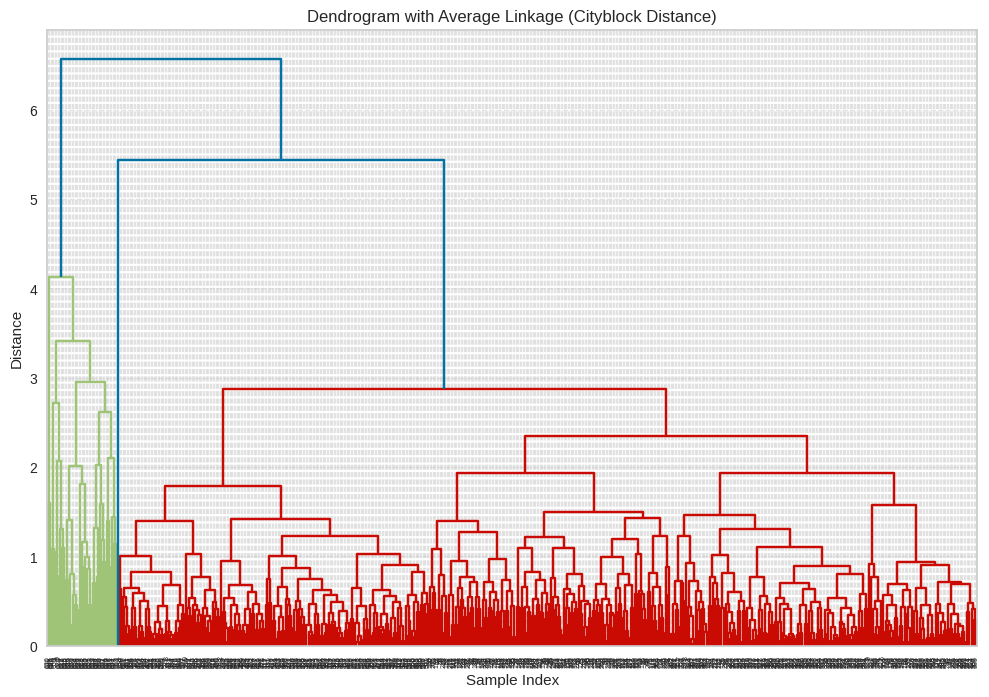

Inspect the dendrogram above for natural cut points (e.g., where large merges happen).

Calculating Silhouette Scores for different number of clusters:
For n_clusters=2, Silhouette Score: 0.6768
For n_clusters=3, Silhouette Score: 0.6038
For n_clusters=4, Silhouette Score: 0.5965
For n_clusters=5, Silhouette Score: 0.5635
For n_clusters=6, Silhouette Score: 0.5623
For n_clusters=7, Silhouette Score: 0.5611
For n_clusters=8, Silhouette Score: 0.3362
For n_clusters=9, Silhouette Score: 0.2266
For n_clusters=10, Silhouette Score: 0.2256


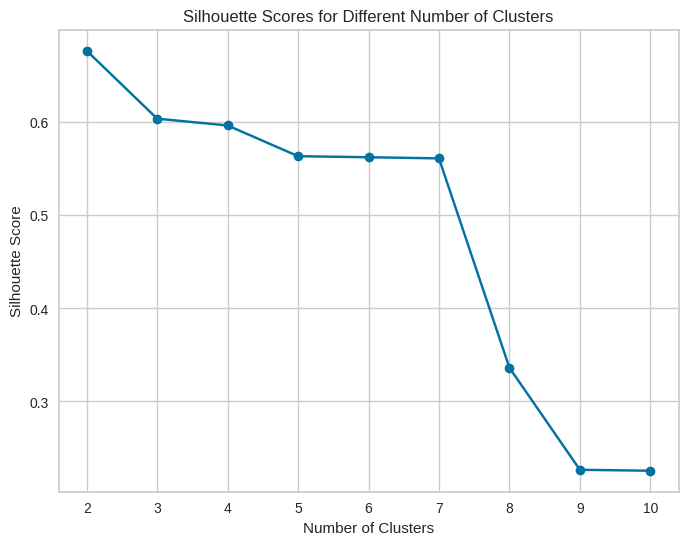


Optimal number of clusters based on silhouette score: 2


In [ ]:

best_linkage = "average"
best_metric = "cityblock"

plt.figure(figsize=(12, 8))
dendrogram(Z, color_threshold=None)
plt.title(f"Dendrogram with {best_linkage.capitalize()} Linkage ({best_metric.capitalize()} Distance)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
print("Inspect the dendrogram above for natural cut points (e.g., where large merges happen).")

silhouette_scores = []
range_n_clusters = range(2, 11)

print("\nCalculating Silhouette Scores for different number of clusters:")
for n_clusters in range_n_clusters:
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=best_linkage, metric=best_metric)
    cluster_labels = agg_clustering.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters={n_clusters}, Silhouette Score: {silhouette_avg:.4f}")


plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


optimal_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters based on silhouette score: {optimal_n_clusters}")

The dendrogram helps us see how to group customers. We look for big gaps in the tree, which suggest natural places to cut and form clusters.

To double-check, we also looked at Silhouette Scores. This score tells us how well each customer fits into their assigned cluster compared to others. A higher score is better.

Based on both the dendrogram and the silhouette scores, having 2 clusters seems to be the best way to group our customers with this method.

# Cluster Profiling


Cluster Profile (Scaled Means):


,total_activity,online_ratio,credit_exposure,log_credit,digital_score,Count
HierCluster,,,,,,
0,8.265574,0.965929,128909.836066,9.846235,-4.413115,610
1,12.580000,7.720000,1229600.000000,11.825521,9.220000,50



Hierarchical Cluster Centroids (Original Scale):


,total_activity,online_ratio,credit_exposure,log_credit,digital_score,Customer_Count
Cluster,,,,,,
0,36.74,3.77,42502415562.95,19.16,-22.04,610.00
1,51.43,19.83,405405344539.44,21.00,35.60,50.00


<Figure size 800x600 with 0 Axes>

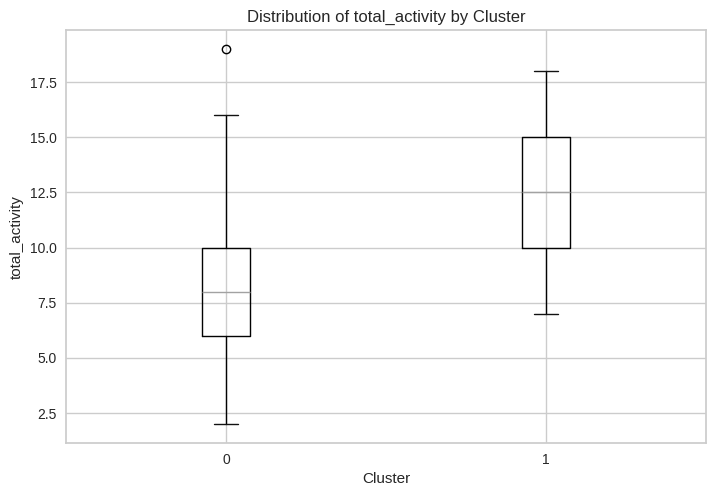

<Figure size 800x600 with 0 Axes>

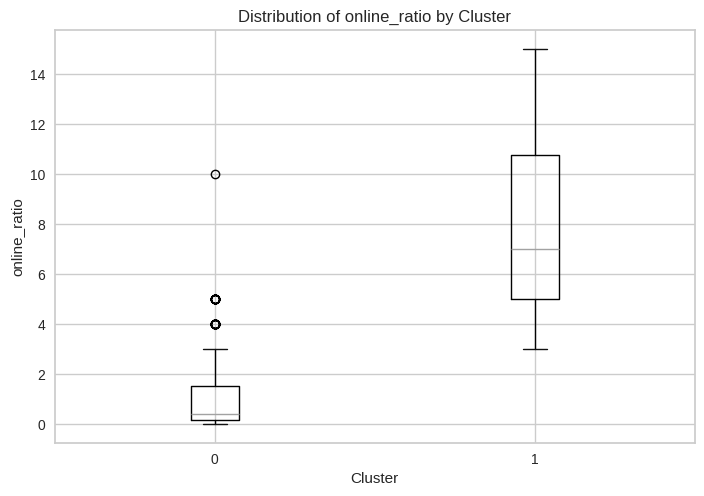

<Figure size 800x600 with 0 Axes>

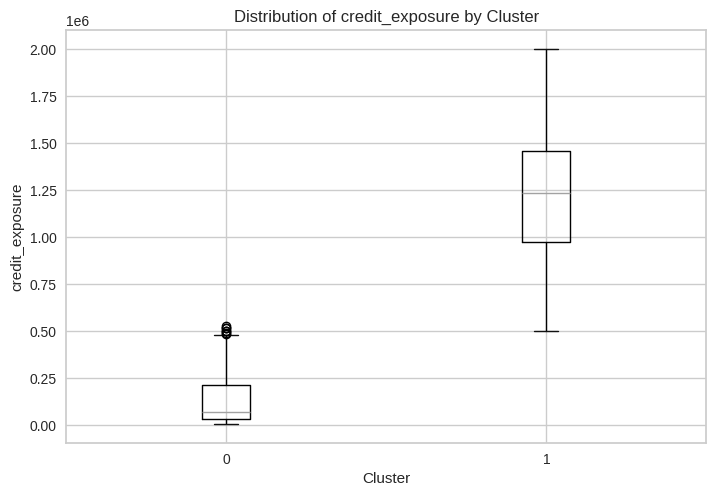

<Figure size 800x600 with 0 Axes>

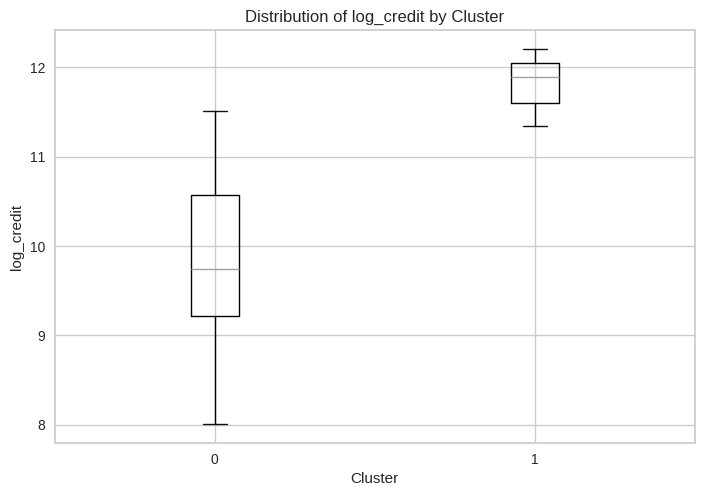

<Figure size 800x600 with 0 Axes>

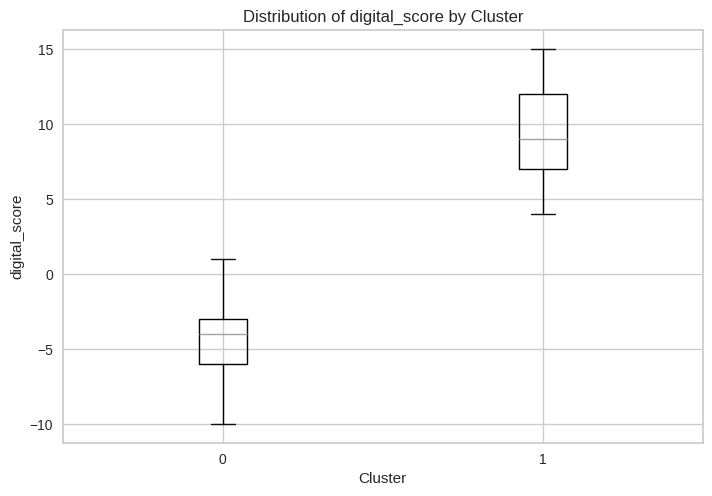

In [ ]:

agg_clustering = AgglomerativeClustering(n_clusters=optimal_n_clusters, linkage=best_linkage, metric=best_metric)
df['HierCluster'] = agg_clustering.fit_predict(scaled_features)

hier_profile = df.groupby("HierCluster")[features].mean()
hier_profile["Count"] = df.groupby("HierCluster").size()
print("\nCluster Profile (Scaled Means):")
display(hier_profile.style.highlight_max(color="lightgreen", axis=0))


hier_centroids_scaled = hier_profile[features]
hier_centroids_original = scaler.inverse_transform(hier_centroids_scaled)
hier_centroid_profile = pd.DataFrame(hier_centroids_original, columns=features)
hier_centroid_profile.index.name = 'Cluster'
hier_centroid_profile["Customer_Count"] = hier_profile["Count"].values

print("\nHierarchical Cluster Centroids (Original Scale):")
display(hier_centroid_profile.style.format("{:.2f}").highlight_max(color="lightblue", axis=0))


for feature in features:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=feature, by='HierCluster')
    plt.title(f"Distribution of {feature} by Cluster")
    plt.suptitle("")
    plt.xlabel("Cluster")
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()



*   **Cluster 0 (Larger Group):** This group is much bigger. They have lower total activity, online ratio, credit exposure, log credit, and digital score compared to Cluster 1. They likely have lower credit limits and prefer less digital interaction.

*   **Cluster 1 (Smaller Group):** This group is smaller but stands out with higher values across all the analyzed features (total activity, online ratio, credit exposure, log credit, and digital score). These are likely the customers with higher credit limits who are very active online.

In simple terms, Hierarchical Clustering with 2 clusters separates customers mainly based on their overall engagement and credit profile, creating one large group of less engaged customers and a smaller group of highly engaged, higher-credit customers.

#K-means vs Hierarchical Clustering

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score

X = df_scaled[features]

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
kmeans_sil = silhouette_score(X, kmeans_labels)

hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
hier_labels = hierarchical.fit_predict(X)
hier_sil = silhouette_score(X, hier_labels)

ari = adjusted_rand_score(kmeans_labels, hier_labels)
kmeans_sizes = pd.Series(kmeans_labels).value_counts()
hier_sizes = pd.Series(hier_labels).value_counts()

print(f"K-means Silhouette Score: {kmeans_sil}")
print(f"Hierarchical Silhouette Score: {hier_sil}")
print(f"Adjusted Rand Index (ARI): {ari} (1=perfect agreement, 0=random)")
print("\nK-means Cluster Sizes:\n", kmeans_sizes)
print("\nHierarchical Cluster Sizes:\n", hier_sizes)

K-means Silhouette Score: 0.38363076196272156
Hierarchical Silhouette Score: 0.36373743834393246
Adjusted Rand Index (ARI): 0.47975623707824677 (1=perfect agreement, 0=random)

K-means Cluster Sizes:
 0    328
2    282
1     50
Name: count, dtype: int64

Hierarchical Cluster Sizes:
 0    390
2    219
1     51
Name: count, dtype: int64


K-means (K=3): Delivered a solid Silhouette Score (0.384), showing decent cluster separation and cohesion. It edged out with more balanced sizes (328, 282, 50), making it practical for segmentation tasks.

Hierarchical (Ward Linkage): Posted a slightly lower Silhouette Score (0.364), with more imbalanced sizes (390, 219, 51). Moderate ARI (0.48) indicates fair agreement between methods, useful for validation.



#**Actionable Insights and Recommendations**

From our clustering, we've spotted three main customer groups with different habits and needs. Here's what we found and some quick tips for each, based on the K-means 3-cluster setup.

**Segment 0 (The Regulars)**
Characteristics: Biggest group—moderate credit limits, a few cards, and they love popping into branches more than going online or calling.
Insights: They dig in-person chats and might not be big on digital stuff. Loyal types who stick to old-school banking.


**Recommendations:**
Market to them with branch-focused deals and easy in-person perks.
Keep branches running smooth and friendly.
Nudge them toward apps with simple demos or rewards during visits.
Segment 1 (The High Rollers - Online)


**Characteristics:** Smallest crew but loaded—high credit limits, tons of cards, all about online banking, rarely hit branches or call.
Insights: Tech whizzes who want fast, digital everything. These are your big spenders expecting top-notch online vibes.


**Recommendations:**
Hit them with fancy online offers, rewards, and premium digital perks.
Beef up the app and site—add chat support and make it super user-friendly.
Roll out high-end cards or wealth tools that fit their style.
Segment 2 (The Callers)

**Characteristics:** Lower credit limits, fewer cards; they use branches and online a bit, but call customer service the most.
Insights: Probably need extra help and like sorting things over the phone—maybe digital feels tricky or they want real talk.


**Recommendations:**
Send clear info on their accounts and stress phone support availability.
Speed up call centers—cut waits, train staff to fix stuff fast.
Guide them to online options via phone tips or easy guides to lighten the load.
Overall Recommendations:

Customize messages and channels per group—no blanket stuff.
Pump resources into their fave ways to connect, but boost weak spots.
Push digital gently for non-tech groups with incentives.
Use Customer Keys to personalize outreach.
This way, AllLife Bank can smarter marketing, better service, and happier customers all around.